In [9]:
import pymc
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [10]:
num_obs = 200

In [27]:
data_obs = 1./np.random.normal(loc=8, scale=4, size=num_obs)

In [38]:
sigma_r = 1./(np.random.normal(loc=200., scale=100., size=num_obs))
sigma_m = np.random.normal(loc=1, scale=.15, size=num_obs)

m_r = np.random.normal(loc=.03, scale=.02, size=num_obs)
m_m = np.random.normal(loc=1.7, scale=.3, size=num_obs)

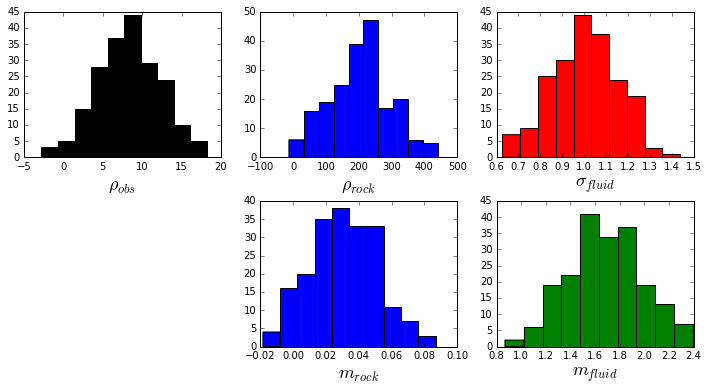

In [39]:
fig = plt.figure(1, [12, 6], dpi=300)
fig.subplots_adjust(hspace=.3)
ax1 = fig.add_subplot(2,3,1)
counts, bins, ignored = ax1.hist(1./data_obs, normed=False, color='black')
ax1.set_xlabel(r'$\rho_{obs}$', fontdict={'size':18})

ax2 = fig.add_subplot(2,3,2)
counts, bins, ignored = ax2.hist(1./sigma_r, normed=False, color='blue')
ax2.set_xlabel(r'$\rho_{rock}$', fontdict={'size':18})

ax3 = fig.add_subplot(2,3,3)
counts, bins, ignored = ax3.hist(sigma_m, normed=False, color='red')
ax3.set_xlabel(r'$\sigma_{fluid}$', fontdict={'size':18})

ax6 = fig.add_subplot(2,3,5)
counts, bins, ignored = ax6.hist(m_r, normed=False, color='blue')
ax6.set_xlabel(r'$m_{rock}$', fontdict={'size':18})

ax8 = fig.add_subplot(2,3,6)
counts, bins, ignored = ax8.hist(m_m, normed=False, color='green')
ax8.set_xlabel(r'$m_{fluid}$', fontdict={'size':18})
plt.show()

In [112]:
# prior information of unknown model parameters
phi_r = pymc.Normal('phi_r', mu=.8, tau=.5)
phi_m = pymc.Normal('phi_m', mu=.3, tau=.2)

In [113]:
# expected outcome is governed by Archies equation of Glove 2010
@pymc.deterministic
def archies(s_r=sigma_r, s_m=sigma_m, 
            p_r=phi_r, p_m=phi_m, 
            m_r=m_r, m_m=m_m):
    if p_r+p_m != 1.0:
        archie_return = np.nan
    else:
        archie_return = (s_r*p_r**m_r)+(s_m*p_m**m_m)
    return archie_return


# likelihood of the observations is a normal distribution
# and is the data itself
sigma_obs = pymc.Normal('sigma_obs', mu=archies, value=data_obs, observed=True)

archie_model = pymc.Model([archies, sigma_r, sigma_m, 
                           phi_r, phi_m, 
                           m_r, m_m, 
                           sigma_obs, 
                           data_obs])


In [114]:
model_fit = pymc.MCMC(archie_model)
model_fit.sample(iter=100000)

 [-----------------100%-----------------] 100000 of 100000 complete in 11.7 sec

             Rock   Fluid
Mean Percent   0.49   0.51
Median Percent 0.49   0.48
Mode Percent   0.07   0.04
Min Percent    0.07   0.04
Max Percent    0.94   0.86
STD            0.25   0.22


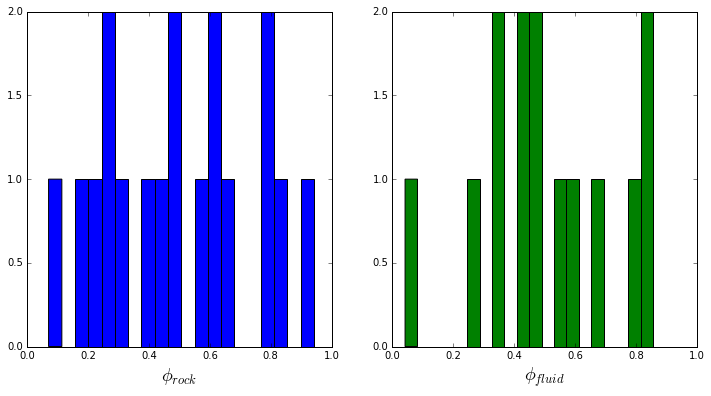

In [115]:
pr_arr = model_fit.trace('phi_r')[:]
pm_arr = model_fit.trace('phi_m')[:]

pr_arr = pr_arr[np.where((pr_arr>=0)& (pr_arr<=1))]
pm_arr = pm_arr[np.where((pm_arr>=0)& (pm_arr<=1))]

# make sure that the rock percentage is confined to values where the 
# total proportion is equal to 1
#pr_arr = pr_arr[np.where(pr_arr > 1-(stats.mode(pm_arr)[0][0])*1.2)]

fig_2 = plt.figure(2, [12, 6], dpi=300)
ax1 = fig_2.add_subplot(1, 2, 1)
h1 = ax1.hist(pr_arr, bins=20, color='blue')
ax1.set_xlim(0, 1)
ax1.set_xlabel(r'$\phi_{rock}$', fontdict={'size':18})


ax3 = fig_2.add_subplot(1, 2, 2)
h3 = ax3.hist(pm_arr, bins=20, color='green')
ax3.set_xlim(0, 1)
ax3.set_xlabel(r'$\phi_{fluid}$', fontdict={'size':18})


print '             Rock   Fluid'
print 'Mean Percent   {0:.2f}   {1:.2f}'.format(pr_arr.mean(),
                                                pm_arr.mean())
print 'Median Percent {0:.2f}   {1:.2f}'.format(np.median(pr_arr),
                                                np.median(pm_arr))
print 'Mode Percent   {0:.2f}   {1:.2f}'.format(stats.mode(pr_arr)[0][0],
                                                stats.mode(pm_arr)[0][0])
print 'Min Percent    {0:.2f}   {1:.2f}'.format(pr_arr.min(),
                                                pm_arr.min())
print 'Max Percent    {0:.2f}   {1:.2f}'.format(pr_arr.max(),
                                                pm_arr.max())
print 'STD            {0:.2f}   {1:.2f}'.format(pr_arr.std(),
                                                pm_arr.std()) 

In [78]:
pr_arr


array([ 0.39560922,  0.2878765 ,  0.0244084 ,  0.07060327,  0.26674422,
        0.06466304,  0.14771287,  0.01647458,  0.46331567,  0.21642902,
        0.3460257 ,  0.74910675,  0.63032472,  0.43205192,  0.63728261,
        0.86615924,  0.86713492,  0.31016082,  0.0809406 ,  0.05146423,
        0.0164066 ,  0.39699151,  0.83388729,  0.97731798,  0.52900142,
        0.29710563,  0.62290122,  0.85757035,  0.8420302 ,  0.96846656,
        0.44000372,  0.478753  ,  0.3925271 ,  0.2073435 ,  0.27641763,
        0.34745147,  0.1052079 ,  0.08514151,  0.21603934,  0.28051176,
        0.71713937,  0.42123583,  0.27764009,  0.32774367,  0.02989375,
        0.24846533,  0.41829222,  0.3654623 ,  0.44857544,  0.98877956,
        0.92709833,  0.90667414,  0.9788108 ,  0.90450771,  0.63976478,
        0.67450844,  0.28144597,  0.89759263,  0.02175846,  0.86536155,
        0.74356601,  0.12199305,  0.78632526])

In [79]:
pm_arr

array([ 0.5476066 ,  0.85185107,  0.35510643,  0.61401394,  0.70195781,
        0.69352253,  0.61706381,  0.76851642])

In [80]:
phi_r

<pymc.distributions.Normal 'phi_r' at 0x126E7130>

In [83]:
phi_r.get_stoch_value()

array([  1.70664827e+100])

In [95]:
help(phi_r)

Help on Normal in module pymc.distributions object:

phi_r = class Normal(pymc.PyMCObjects.Stochastic)
 |  N = Normal(name, mu, tau, value=None, observed=False, size=1, trace=True, rseed=True, doc=None, verbose=-1, debug=False)
 |  
 |  Stochastic variable with Normal distribution.
 |  Parents are: mu, tau.
 |  
 |  Docstring of log-probability function:
 |  
 |      Normal log-likelihood.
 |  
 |      .. math::
 |          f(x \mid \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |      :Parameters:
 |        - `x` : Input data.
 |        - `mu` : Mean of the distribution.
 |        - `tau` : Precision of the distribution, which corresponds to
 |          :math:`1/\sigma^2` (tau > 0).
 |  
 |      .. note::
 |         - :math:`E(X) = \mu`
 |         - :math:`Var(X) = 1/\tau`
 |  
 |  Method resolution order:
 |      Normal
 |      pymc.PyMCObjects.Stochastic
 |      pymc.Node.StochasticBase
 |      pymc.six.NewBase
 |      pymc.Node.Variable
 